In [1]:
%matplotlib inline

/home/hadoop/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
!git clone https://github.com/marco-c/crashcorrelations

Cloning into 'crashcorrelations'...
remote: Counting objects: 256, done.
remote: Total 256 (delta 0), reused 0 (delta 0), pack-reused 256
Receiving objects: 100% (256/256), 478.99 KiB | 0 bytes/s, done.
Resolving deltas: 100% (163/163), done.
Checking connectivity... done.


In [3]:
from crashcorrelations import crash_deviations, download_data, plot

In [4]:
df_a = crash_deviations.get_crashes(sc, versions=download_data.get_versions('release'), days=5)
df_b = df_a.filter(df_a['signature'].startswith('npmcffplg32.dll')) # or df_a['signature'] == 'SOME_SIGNATURE'

1 RULES: 27
Column<(((((((isnull(jit_category) && isnull(is_garbage_collecting)) && (plugin = false)) && (platform = Windows NT)) && isnull(number_of_processors)) && (a0 = true)) && isnull(dom_ipc_enabled)) && (build_id = 20160726073904))>


/home/hadoop/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


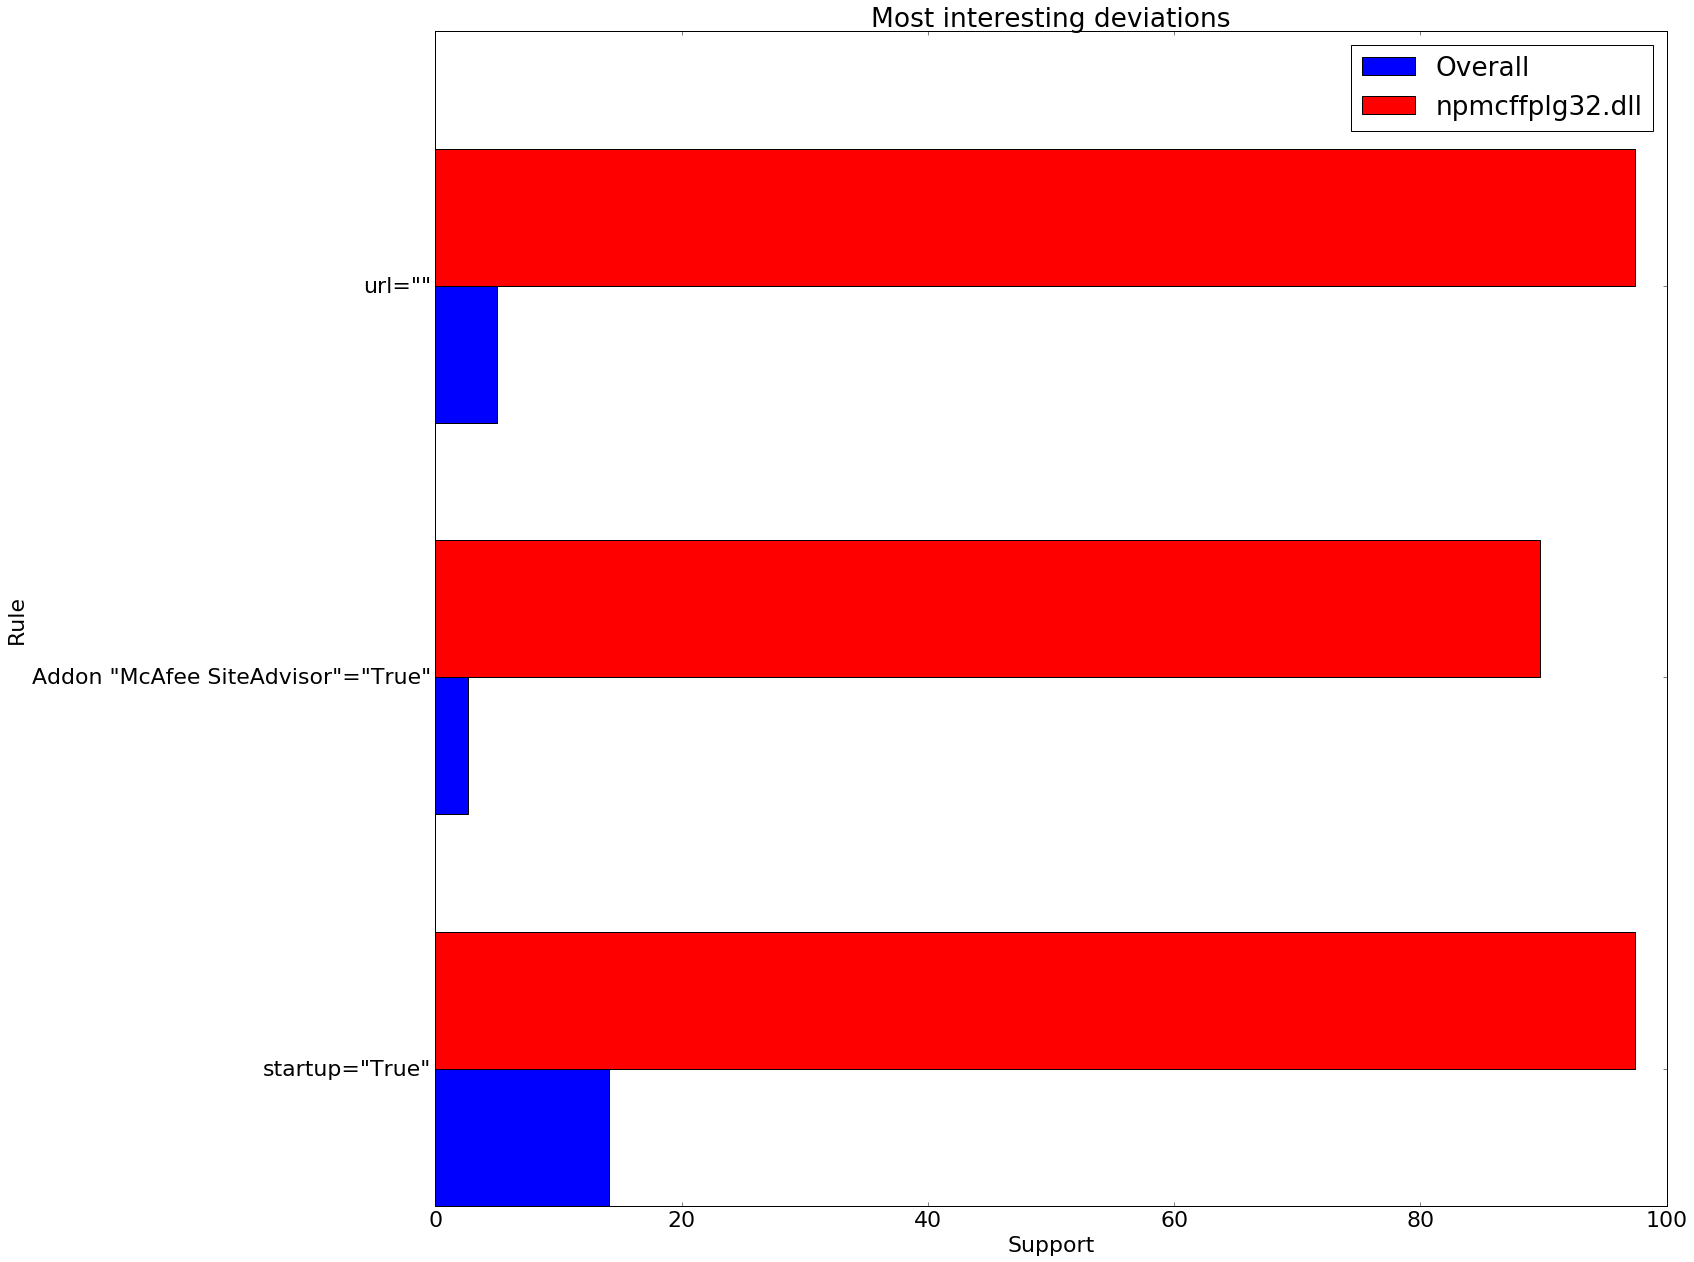

In [5]:
results, total_a, total_b = crash_deviations.find_deviations(sc, df_a, b=df_b, min_support_diff=0.15, min_corr=0.03)
plot.plot(results, total_a, total_b, 'Overall', 'npmcffplg32.dll')